El uso de PCA para data
https://arxiv.org/pdf/1001.1122.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import mpl_toolkits.mplot3d  # necesario para 3D plots matplitlib < 3.2.0

import sklearn as sk
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('iris.csv')
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
XY = data.values
pca = PCA(n_components=2)
pca.fit(XY)

ValueError: could not convert string to float: 'setosa'

In [11]:
# debemos de convertir a numeros los nombres de las flores
# para poder utilizar PCA
print(data['class'].unique())
# 0 = setosa
# 1 = versicolor
# 2 = virginica

data['class'] = data['class'].replace('setosa', 0)
data['class'] = data['class'].replace('versicolor', 1)
data['class'] = data['class'].replace('virginica', 2)

In [13]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
X = data.values[:, :3] # tomamos las primeras 3 columnas para usar como features
Target = data.values[:, 4] # tomamos la ultima columna para usar como labels (target)

([], [])

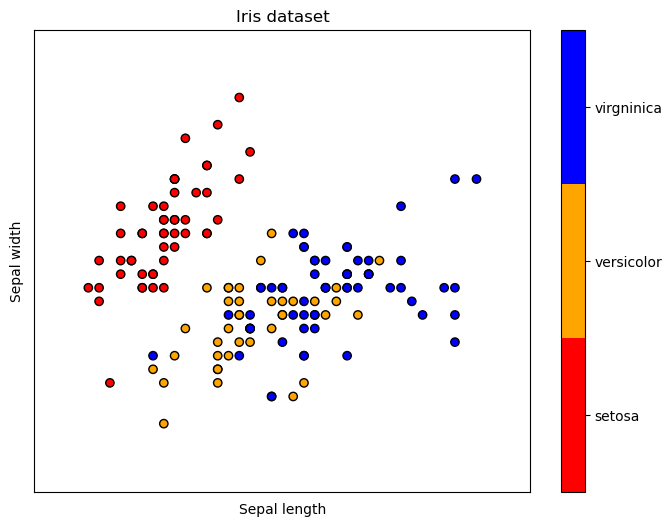

In [49]:
# aqui solo graficaremos las dos primeras features

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

import matplotlib
cmap = matplotlib.colors.ListedColormap(['red', 'orange', 'blue'])
bounds=[0,1,2,3]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
# plot training points
sc = plt.scatter(X[:, 0], X[:, 1], c=Target, cmap=cmap, norm=norm, edgecolor="k")

# legend
cbar = plt.colorbar(sc)
cbar.set_ticks([0.5, 1.5, 2.5])
cbar.set_ticklabels(["setosa", "versicolor", "virgninica"])


plt.title("Iris dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



In [63]:
# datos reducidos
X_reduced = PCA(n_components=3).fit_transform(X)

In [76]:
# esta funcion quedara guardada en libplot3d.py
# para poder ser importada en otros notebooks
def plot3d_cbar(X, 
    ColorPoints = { 'Target': Target, 'Ticks': [0,1,2], 'TicksLabels' : ["setosa", "versicolor", "virgninica"]},
    Text = { 'Title': "First three PCA directions", 'XLabel': "1st eigenvector", 'YLabel': "2nd eigenvector", 'ZLabel': "3rd eigenvector" },
    Camera = { 'Elevation': -150, 'Azimuth': 100 }
    ):

    """
    Es importante que Target y X tengan la misma longitud, su longitud siendo la cantidad de muestras
    """
    import matplotlib
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(1, figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=Camera['Elevation'], azim=Camera['Azimuth'])
    
    # colors
    cmap = matplotlib.colors.ListedColormap(['red', 'orange', 'blue'])
    bounds=[0,1,2,3]
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

    # scatter plot
    scc = ax.scatter(
        X[:, 0],
        X[:, 1],
        X[:, 2],
        c=ColorPoints['Target'],
        cmap=cmap,
        edgecolor="k",
        s=40,
    )

    # creamos la color bar
    cbar = plt.colorbar(scc)
    cbar.set_ticks(ColorPoints['Ticks'])
    cbar.set_ticklabels(ColorPoints['TicksLabels'])
    ax.set_title(Text['Title'])
    ax.set_xlabel(Text['XLabel'])
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel(Text['YLabel'])
    ax.yaxis.set_ticklabels([])
    ax.set_zlabel(Text['ZLabel'])
    ax.zaxis.set_ticklabels([])

    plt.show()

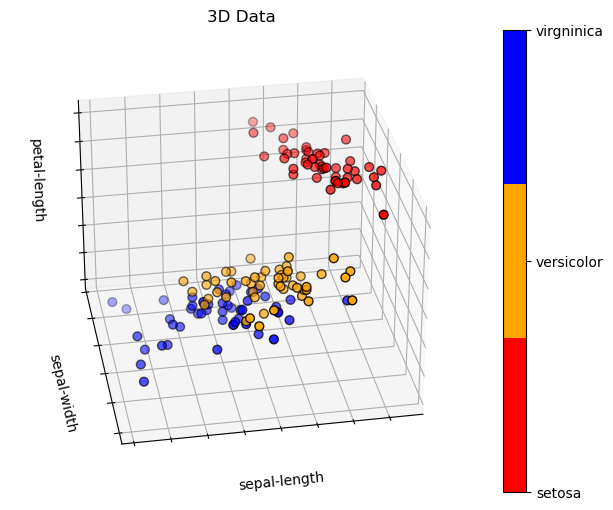

In [80]:
ColorPoints = { 'Target': Target, 'Ticks': [0,1,2], 'TicksLabels' : ["setosa", "versicolor", "virgninica"]}
Text = {'Title': "3D Data", 'XLabel': 'sepal-length', 'YLabel': 'sepal-width', 'ZLabel': 'petal-length'}
Camera = { 'Elevation': -150, 'Azimuth': 100 }

plot3d_cbar(X, ColorPoints, Text, Camera)

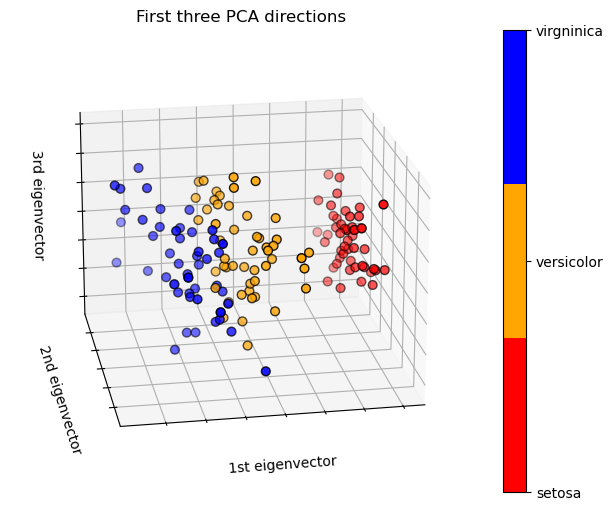

In [88]:
ColorPoints = {'Target': Target, 'Ticks': [0,1,2], 'TicksLabels' : ["setosa", "versicolor", "virgninica"]}
Text = {'Title': "First three PCA directions", 'XLabel': "1st eigenvector", 'YLabel': "2nd eigenvector", 'ZLabel': "3rd eigenvector" }
Camera = {'Elevation': -160, 'Azimuth': 100 }

plot3d_cbar(X_reduced, ColorPoints, Text, Camera)